# Ground Motion Displacement RMS vs Time

*an example simple tutorial for getting seismic data, computing the power spectral densities, extracting the RMS and plotting*

Required:

- python
- obspy (and its dependencies)
- pandas
- jupyter
- notebook

this should be easy to set up in a conda env: ``conda create -n covid python=3.7 obspy pandas jupyter notebook``

Author: Thomas Lecocq @seismotom

## Step 1: imports

In [1]:
import datetime
import os
import glob

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

from obspy import UTCDateTime, read
from obspy.clients.fdsn import Client
from obspy.signal import PPSD


## Step 2: Define Start/End dates and Seismic Channel

You'll have to make sure the seed_id you request is indeed available from the ``data_provider``

In [2]:
start = UTCDateTime("2020-02-13")
end = UTCDateTime() # means "now"

network = "CH"
station = "SBERN,SZUZ,SGEV"
location = ""
channel = "HG*"

data_provider = "ETH"
logo = plt.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Logo_SED_2014.png/220px-Logo_SED_2014.png')


## Step 3: Download the seismic waveform data

This step is coded so that only the last day is redownloaded iif the daily files are present on the disk.

The request gets the target day +- 30 minutes to avoid having gaps at the end of each day (need 1 window covering midnight).

In [4]:
datelist = pd.date_range(start.datetime, end.datetime, freq="D")
c = Client(data_provider)

for day in datelist:
    fn = day.strftime("%Y-%m-%d.mseed")
    print(fn)
    if day != datelist[-1] and os.path.isfile(fn):
        continue
    else:
        st = c.get_waveforms(network, station, location, channel,
                             UTCDateTime(day)-1801, UTCDateTime(day)+86400+1801, attach_response=True)
        print(st)
        st.write(fn)
resp = c.get_stations(UTCDateTime(day), network=network, station=station, location=location,
                      channel=channel, level="response")
print(resp)


2020-02-13.mseed
2020-02-14.mseed
2020-02-15.mseed
2020-02-16.mseed
2020-02-17.mseed
2020-02-18.mseed
2020-02-19.mseed
2020-02-20.mseed
2020-02-21.mseed
2020-02-22.mseed
2020-02-23.mseed
2020-02-24.mseed
2020-02-25.mseed
2020-02-26.mseed
2020-02-27.mseed
2020-02-28.mseed
2020-02-29.mseed
2020-03-01.mseed
2020-03-02.mseed
2020-03-03.mseed
2020-03-04.mseed
2020-03-05.mseed
2020-03-06.mseed
2020-03-07.mseed
2020-03-08.mseed
2020-03-09.mseed
2020-03-10.mseed
2020-03-11.mseed
2020-03-12.mseed
2020-03-13.mseed
2020-03-14.mseed
2020-03-15.mseed
2020-03-16.mseed
2020-03-17.mseed
2020-03-18.mseed
2020-03-19.mseed
2020-03-20.mseed
2020-03-21.mseed
2020-03-22.mseed
2020-03-23.mseed
2020-03-24.mseed
2020-03-25.mseed
2020-03-26.mseed
2020-03-27.mseed
2020-03-28.mseed
2020-03-29.mseed
2020-03-30.mseed
2020-03-31.mseed
2020-04-01.mseed
2020-04-02.mseed
2020-04-03.mseed
2020-04-04.mseed
2020-04-05.mseed
9 Trace(s) in Stream:
CH.SGEV..HGE  | 2020-04-04T23:29:57.520000Z - 2020-04-05T18:19:29.964000Z | 2

## Step 4: Compute PPSDs using custom paramters

These parameters are set to allow the PSDs to be "nervous", not as smooth as the default PQLX ones.

In [5]:
for day in datelist:
    fn_in = day.strftime("%Y-%m-%d.mseed")
    if day == datelist[-1] :
        continue
    stall = read(fn_in)
    for mseedid in list(set([tr.id for tr in stall])):
        fn_out = day.strftime("%Y-%m-%d-"+mseedid+".npz")
        if os.path.isfile(fn_out):
            print("%s done already."%fn_out)
            continue
        st = stall.select(id=mseedid)
        st.attach_response(resp)
        ppsd = PPSD(st[0].stats, metadata=resp,
                    ppsd_length=1800, overlap=0.5,
                    period_smoothing_width_octaves=0.025,
                    period_step_octaves=0.0125,
                    period_limits=(0.008, 50),
                    db_bins=(-200, 20, 0.25))
        ppsd.add(st)
        ppsd.save_npz(fn_out[:-4])
        print(st)
        del st, ppsd
    del stall


2020-02-13-CH.SZUZ..HGZ.npz done already.
2020-02-13-CH.SGEV..HGZ.npz done already.
2020-02-13-CH.SGEV..HGN.npz done already.
2020-02-13-CH.SBERN..HGN.npz done already.
2020-02-13-CH.SZUZ..HGE.npz done already.
2020-02-13-CH.SBERN..HGE.npz done already.
2020-02-13-CH.SBERN..HGZ.npz done already.
2020-02-13-CH.SGEV..HGE.npz done already.
2020-02-13-CH.SZUZ..HGN.npz done already.
2020-02-14-CH.SZUZ..HGZ.npz done already.
2020-02-14-CH.SGEV..HGZ.npz done already.
2020-02-14-CH.SGEV..HGN.npz done already.
2020-02-14-CH.SBERN..HGN.npz done already.
2020-02-14-CH.SZUZ..HGE.npz done already.
2020-02-14-CH.SBERN..HGE.npz done already.
2020-02-14-CH.SBERN..HGZ.npz done already.
2020-02-14-CH.SGEV..HGE.npz done already.
2020-02-14-CH.SZUZ..HGN.npz done already.
2020-02-15-CH.SZUZ..HGZ.npz done already.
2020-02-15-CH.SGEV..HGZ.npz done already.
2020-02-15-CH.SGEV..HGN.npz done already.
2020-02-15-CH.SBERN..HGN.npz done already.
2020-02-15-CH.SZUZ..HGE.npz done already.
2020-02-15-CH.SBERN..HGE.np

2020-03-06-CH.SZUZ..HGZ.npz done already.
2020-03-06-CH.SGEV..HGZ.npz done already.
2020-03-06-CH.SGEV..HGN.npz done already.
2020-03-06-CH.SBERN..HGN.npz done already.
2020-03-06-CH.SZUZ..HGE.npz done already.
2020-03-06-CH.SBERN..HGE.npz done already.
2020-03-06-CH.SBERN..HGZ.npz done already.
2020-03-06-CH.SGEV..HGE.npz done already.
2020-03-06-CH.SZUZ..HGN.npz done already.
2020-03-07-CH.SZUZ..HGZ.npz done already.
2020-03-07-CH.SGEV..HGZ.npz done already.
2020-03-07-CH.SGEV..HGN.npz done already.
2020-03-07-CH.SBERN..HGN.npz done already.
2020-03-07-CH.SZUZ..HGE.npz done already.
2020-03-07-CH.SBERN..HGE.npz done already.
2020-03-07-CH.SBERN..HGZ.npz done already.
2020-03-07-CH.SGEV..HGE.npz done already.
2020-03-07-CH.SZUZ..HGN.npz done already.
2020-03-08-CH.SZUZ..HGZ.npz done already.
2020-03-08-CH.SGEV..HGZ.npz done already.
2020-03-08-CH.SGEV..HGN.npz done already.
2020-03-08-CH.SBERN..HGN.npz done already.
2020-03-08-CH.SZUZ..HGE.npz done already.
2020-03-08-CH.SBERN..HGE.np

/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:996: RuntimeWarning: Mean of empty slice.
  smoothed_psd.append(specs.mean())
/Users/fmassin/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


4 Trace(s) in Stream:
CH.SZUZ..HGZ | 2020-03-20T23:29:57.724000Z - 2020-03-21T09:35:33.328000Z | 250.0 Hz, 9083902 samples
CH.SZUZ..HGZ | 2020-03-21T09:35:35.524000Z - 2020-03-21T09:35:38.816000Z | 250.0 Hz, 824 samples
CH.SZUZ..HGZ | 2020-03-21T09:35:33.332000Z - 2020-03-21T09:35:35.520000Z | 250.0 Hz, 548 samples
CH.SZUZ..HGZ | 2020-03-21T09:35:38.820000Z - 2020-03-22T00:30:01.660000Z | 250.0 Hz, 13415711 samples
1 Trace(s) in Stream:
CH.SGEV..HGZ | 2020-03-20T23:29:58.076000Z - 2020-03-22T00:30:02.208000Z | 250.0 Hz, 22501034 samples
1 Trace(s) in Stream:
CH.SGEV..HGN | 2020-03-20T23:29:58.524000Z - 2020-03-22T00:30:01.632000Z | 250.0 Hz, 22500778 samples
1 Trace(s) in Stream:
CH.SBERN..HGN | 2020-03-20T23:29:57.408000Z - 2020-03-22T00:30:01.108000Z | 250.0 Hz, 22500926 samples
2020-03-21-CH.SZUZ..HGE.npz done already.
1 Trace(s) in Stream:
CH.SBERN..HGE | 2020-03-20T23:29:57.636000Z - 2020-03-22T00:30:01.872000Z | 250.0 Hz, 22501060 samples
1 Trace(s) in Stream:
CH.SBERN..HGZ | 202

2 Trace(s) in Stream:
CH.SBERN..HGE | 2020-03-22T23:29:58.532000Z - 2020-03-23T17:24:59.632000Z | 250.0 Hz, 16125276 samples
CH.SBERN..HGE | 2020-03-23T17:26:23.940000Z - 2020-03-24T00:30:01.288000Z | 250.0 Hz, 6354338 samples
2 Trace(s) in Stream:
CH.SBERN..HGZ | 2020-03-22T23:29:58.188000Z - 2020-03-23T17:24:59.728000Z | 250.0 Hz, 16125386 samples
CH.SBERN..HGZ | 2020-03-23T17:26:23.548000Z - 2020-03-24T00:30:01.120000Z | 250.0 Hz, 6354394 samples
7 Trace(s) in Stream:
CH.SGEV..HGE | 2020-03-22T23:29:58.376000Z - 2020-03-23T06:28:37.868000Z | 250.0 Hz, 6279874 samples
CH.SGEV..HGE | 2020-03-23T06:29:08.048000Z - 2020-03-23T06:37:54.156000Z | 250.0 Hz, 131528 samples
CH.SGEV..HGE | 2020-03-23T06:28:37.872000Z - 2020-03-23T06:28:42.788000Z | 250.0 Hz, 1230 samples
CH.SGEV..HGE | 2020-03-23T06:37:54.160000Z - 2020-03-23T06:37:55.804000Z | 250.0 Hz, 412 samples
CH.SGEV..HGE | 2020-03-23T06:28:42.792000Z - 2020-03-23T06:29:08.044000Z | 250.0 Hz, 6314 samples
CH.SGEV..HGE | 2020-03-23T06:3

5 Trace(s) in Stream:
CH.SBERN..HGZ | 2020-03-24T23:29:58.116000Z - 2020-03-25T09:14:46.672000Z | 250.0 Hz, 8772140 samples
CH.SBERN..HGZ | 2020-03-25T09:17:39.828000Z - 2020-03-25T10:07:56.664000Z | 250.0 Hz, 754210 samples
CH.SBERN..HGZ | 2020-03-25T10:07:57.588000Z - 2020-03-25T10:08:00.592000Z | 250.0 Hz, 752 samples
CH.SBERN..HGZ | 2020-03-25T10:07:56.668000Z - 2020-03-25T10:07:57.584000Z | 250.0 Hz, 230 samples
CH.SBERN..HGZ | 2020-03-25T10:08:00.596000Z - 2020-03-26T00:30:01.616000Z | 250.0 Hz, 12930256 samples
2 Trace(s) in Stream:
CH.SGEV..HGE | 2020-03-24T23:29:58.536000Z - 2020-03-25T09:14:47.860000Z | 250.0 Hz, 8772332 samples
CH.SGEV..HGE | 2020-03-25T09:17:43.448000Z - 2020-03-26T00:30:01.276000Z | 250.0 Hz, 13684458 samples
2 Trace(s) in Stream:
CH.SZUZ..HGN | 2020-03-24T23:29:58.200000Z - 2020-03-25T09:14:46.732000Z | 250.0 Hz, 8772134 samples
CH.SZUZ..HGN | 2020-03-25T09:17:49.856000Z - 2020-03-26T00:30:02.084000Z | 250.0 Hz, 13683058 samples
4 Trace(s) in Stream:
CH.S

1 Trace(s) in Stream:
CH.SZUZ..HGN | 2020-03-29T23:29:58.784000Z - 2020-03-31T00:30:02.172000Z | 250.0 Hz, 22500848 samples
2 Trace(s) in Stream:
CH.SZUZ..HGZ | 2020-03-30T23:29:57.552000Z - 2020-03-31T17:24:48.628000Z | 250.0 Hz, 16122770 samples
CH.SZUZ..HGZ | 2020-03-31T17:25:40.248000Z - 2020-04-01T00:30:02.348000Z | 250.0 Hz, 6365526 samples
2 Trace(s) in Stream:
CH.SGEV..HGZ | 2020-03-30T23:29:57.504000Z - 2020-03-31T17:24:49.380000Z | 250.0 Hz, 16122970 samples
CH.SGEV..HGZ | 2020-03-31T17:25:34.472000Z - 2020-04-01T00:30:02.244000Z | 250.0 Hz, 6366944 samples
2 Trace(s) in Stream:
CH.SGEV..HGN | 2020-03-30T23:29:58.436000Z - 2020-03-31T17:24:48.792000Z | 250.0 Hz, 16122590 samples
CH.SGEV..HGN | 2020-03-31T17:25:34.476000Z - 2020-04-01T00:30:02.480000Z | 250.0 Hz, 6367002 samples
2 Trace(s) in Stream:
CH.SBERN..HGN | 2020-03-30T23:29:57.984000Z - 2020-03-31T17:24:49.340000Z | 250.0 Hz, 16122840 samples
CH.SBERN..HGN | 2020-03-31T17:25:30.376000Z - 2020-04-01T00:30:01.124000Z | 

## Step 5: Reload daily PSDs from the disk and create a single PPSD object:

In [3]:
ppsds={}
for day in datelist:
    for fn in glob.glob(day.strftime("%Y-%m-%d-*.npz")):
        mseedid = fn.split("-")[3][:-4]
        if mseedid not in ppsds:
            ppsds[mseedid] = PPSD.load_npz(fn,True)
        else:
            ppsds[mseedid].add_npz(fn)

/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-02-14-CH.SGEV..HGN.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segments omitted in file '2020-02-14-CH.SGEV..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-02-14-CH.SBERN..HGE.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-02-14-CH.SZUZ..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segmen

/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-02-18-CH.SBERN..HGN.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segments omitted in file '2020-02-18-CH.SBERN..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-02-18-CH.SZUZ..HGN.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-02-18-CH.SZUZ..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segme

/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segments omitted in file '2020-02-22-CH.SBERN..HGN.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-02-22-CH.SGEV..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-02-22-CH.SBERN..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-02-23-CH.SZUZ..HGE.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segme

/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segments omitted in file '2020-02-27-CH.SGEV..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segments omitted in file '2020-02-27-CH.SGEV..HGN.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-02-27-CH.SZUZ..HGN.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segments omitted in file '2020-02-27-CH.SBERN..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segmen

/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-03-03-CH.SGEV..HGE.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 35/130 segments omitted in file '2020-03-03-CH.SBERN..HGN.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segments omitted in file '2020-03-03-CH.SZUZ..HGE.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 35/130 segments omitted in file '2020-03-03-CH.SBERN..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 s

/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segments omitted in file '2020-03-07-CH.SGEV..HGN.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-03-08-CH.SBERN..HGE.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segments omitted in file '2020-03-08-CH.SGEV..HGE.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-03-08-CH.SZUZ..HGE.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segmen

/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segments omitted in file '2020-03-12-CH.SBERN..HGN.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-03-12-CH.SBERN..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-03-12-CH.SGEV..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segments omitted in file '2020-03-12-CH.SZUZ..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segme

/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-03-17-CH.SZUZ..HGN.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segments omitted in file '2020-03-17-CH.SBERN..HGN.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-03-17-CH.SZUZ..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segments omitted in file '2020-03-17-CH.SGEV..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segmen

/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-03-22-CH.SBERN..HGN.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-03-22-CH.SZUZ..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segments omitted in file '2020-03-22-CH.SZUZ..HGN.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-03-22-CH.SGEV..HGN.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segmen

/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-03-26-CH.SBERN..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-03-26-CH.SGEV..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-03-26-CH.SGEV..HGN.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segments omitted in file '2020-03-27-CH.SZUZ..HGE.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segmen

/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-03-31-CH.SZUZ..HGN.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/99 segments omitted in file '2020-03-31-CH.SZUZ..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-03-31-CH.SZUZ..HGE.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segments omitted in file '2020-03-31-CH.SBERN..HGE.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/99 segmen

/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/57 segments omitted in file '2020-04-05-CH.SZUZ..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/57 segments omitted in file '2020-04-05-CH.SGEV..HGZ.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/57 segments omitted in file '2020-04-05-CH.SGEV..HGN.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 3/57 segments omitted in file '2020-04-05-CH.SBERN..HGE.npz' (time ranges already covered).
  warnings.warn(msg)
/Users/fmassin/anaconda3/lib/python3.5/site-packages/obspy/signal/spectral_estimation.py:1516: UserWarning: 4/57 segmen

## Step 6: Standard plots:

In [ ]:
[ppsd.plot(max_percentage=10) for mseedid, ppsd in ppsds.items()]
[ppsd.plot_temporal(0.10) for mseedid, ppsd in ppsds.items()]
[ppsd.plot_spectrogram(clim=(-160,-100)) for mseedid, ppsd in ppsds.items()]

## Step 7: Process PSDs to extract the RMS(displacement)

This can be done for multiple filters at once (``freqs`` below):

In [10]:
# Define frequency bands of interest:
freqs = [(0.1,1.0),(1.0,20.0),(4.0,14.0),(4.0,20.0)]


def rms(s, f):
    # Parseval: the RMS in time domain is the sqrt of the integral of the power spectrum
    return np.sqrt(np.trapz(s, f))

displacement_RMS = {}
for mseedid, ppsd in ppsds.items():
    per = ppsd.period_bin_centers
    displacement_RMS[mseedid] = []
    for psd in ppsd.psd_values:
        RMS = {}
        for fmin, fmax in freqs:
            ix = np.where((per>=1.0/fmax) & (per<=1.0/fmin))

            # acceleration power spectrum in Hz
            spec = psd.copy()[ix][::-1]
            f = 1.0/per.copy()[ix][::-1]

            # remove NaNs from the list
            valid = np.where(np.isfinite(spec))[0]
            spec = spec[valid]
            f = f[valid]

            w2f = (2.0 * np.pi * f)

            # The acceleration amplitude spectrum (dB to Power! = divide by 10 and not 20!)
            amp = 10.0**(spec/10.) 

            # velocity spectrum (divide by omega**2)
            vamp = amp / w2f**2

            # displacement spectrum (divide by omega**2)
            damp =  vamp / w2f**2

            RMS["%.1f-%.1f"%(fmin, fmax)] = rms(damp, f)

        displacement_RMS[mseedid].append(RMS)
        index = pd.DatetimeIndex([d.datetime for d in ppsd.times_processed])
    displacement_RMS[mseedid] = pd.DataFrame(displacement_RMS[mseedid], index=index)
    print(mseedid," rms done.")

CH.SZUZ..HGN  rms done.
CH.SBERN..HGN  rms done.
CH.SGEV..HGE  rms done.
CH.SGEV..HGZ  rms done.
CH.SZUZ..HGE  rms done.
CH.SGEV..HGN  rms done.
CH.SBERN..HGE  rms done.
CH.SBERN..HGZ  rms done.
CH.SZUZ..HGZ  rms done.


## Step 8: Custom plot for a single frequency band:

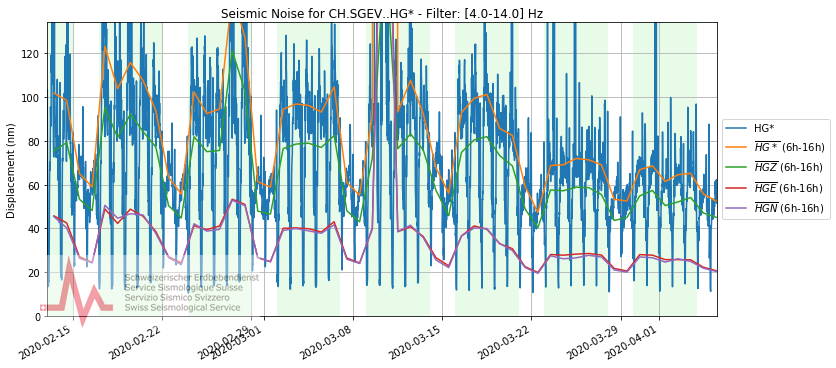

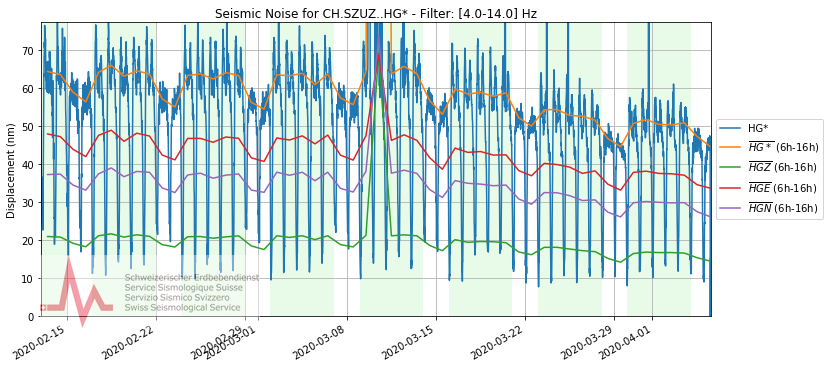

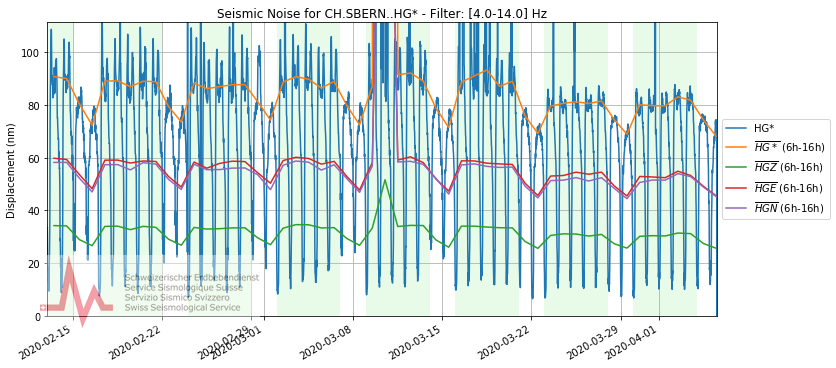

In [119]:
band = "4.0-14.0"

for channelcode in list(set([k[:-1] for k in displacement_RMS])):
    fig = plt.figure(figsize=(12,6))
    try:
        fig.figimage(logo, 40, 40, alpha=.4, zorder=1)
    except:
        pass
    
    Z = displacement_RMS[channelcode+'Z'][band]
    E = displacement_RMS[channelcode+'E'][band]
    N = displacement_RMS[channelcode+'N'][band]
    codes = channelcode[-2:]
    codes = [codes+'*',codes+'Z',codes+'E',codes+'N']
    
    d = Z.copy()
    for i,t in enumerate(d.index):        
        d[i] = 0
        if len(E.index)-1<i or len(N.index)-1<i:
            break
        if (abs(E.index[0].timestamp()-N.index[0].timestamp())<60 and
            abs(Z.index[0].timestamp()-N.index[0].timestamp())<60):
            d[i] = (E[i]**2+N[i]**2+Z[i]**2)**.5
    
    plt.plot(d.index, d, label = codes[0])
    
    for i,data in enumerate([d, Z, E, N]):
        rs = data.copy().between_time("6:00", "16:00")
        rs = rs.resample("1D" ).median().tshift(12, "H")
        plt.plot(rs.index, rs, 
                 label="$\overline{%s}$ (6h-16h)"%codes[i])#, c='purple')

    

    # Get normal business days and set their background color to green
    db = pd.bdate_range(start.datetime, end.datetime)
    for dbi in db:
        plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                    facecolor='lightgreen', edgecolor="none",
                    alpha=0.2, zorder=-10)

    scale = 1e9
    plt.ylim(0,np.percentile(d,95)*1.1)
    ticks = ticker.FuncFormatter(lambda x, pos: "{0:g}".format(x*scale))
    plt.gca().yaxis.set_major_formatter(ticks)
    plt.ylabel("Displacement (nm)")

    plt.title('Seismic Noise for %s - Filter: [%s] Hz' % (channelcode+'*',
                                                          band))
    plt.xlim(d.index.min(), d.index.max())
    fig.autofmt_xdate()
    plt.grid(True, zorder=-1)
    plt.gca().set_axisbelow(True)    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()